# Solution of the final project



### 1. Data exploration

* 1.1. Since the dataset is imbalanced (**93.79%** of "- 50000."-class and **6.21%** of "50000 +."-class)  the accuracy score is not appropriate because it will always be no less than majority percentage of the data. For that reason the most efficient metric will be **f1-score**
* 1.2. I **splited** the train data on the trainig part and validation part. Model is checked by using **cross-validation** on the training part and verified on the validation part
* 1.3. Almost entire data is skewed. Implementation of PCA decreased the quality of model. The KBest with ANOVA-analysis and the SelectFromModel with an estimator AdaBoostClassifier and threshold in the range of 0.005 to 0.03 obtained the same result. Therefore there is no need to implement feature selection methods

### [25%] 2. Data preprocessing

* 2.1. In the dataset there is no any missing vlues. However there are come question marks that can be treated as missing values. We have 8 such features: GRINST, MIGMTR1, MIGMTR3, MIGMTR4, MIGSUN, PEFNTVTY, PEMNTVTY, PENATVTY
* 2.2. Since we have a deal with binary classification the best encoding is one-hot for categorical features. But it will make the dataset extrimelly high-dimentional. Therefore, the features that have less than 10 unique values are encoded with one-hot method. The rest of the categorical features are encoded using catboost method because accoding to the graph and statistics from the DF they are skewed. Both of these methon prevet from data leakage and overfitting. For the numeric values we embed the nomalization using Standard scaling
* 2.3. In order to improve the result the anomaly detection technique was implemented (Isolation Forest). It got slight improvement with 0.1% elimination
* 2.4. To get more quality of the model the clustering technique (GaussianMixture) was implemented. The best number of clusters is 8 

### [25%] 3. Model training

* 3.1. The oversampling and undersanpling methods were implemented. The best strategies are 0.3 sampling for the both methods. 
* 3.2. For the binary classification task the following models were used:        

               RandomForestClassifier(class_weight='balanced', n_jobs=-1, n_estimators=100, random_state=13)
             , LogisticRegression(class_weight='balanced', random_state=13)
             , GradientBoostingClassifier(random_state=13)
             , LGBMClassifier(class_weight='balanced', n_jobs=-1, n_estimators=100, random_state=13)
             , AdaBoostClassifier(n_estimators=100, random_state=13)
             , BalancedBaggingClassifier(n_estimators=100, n_jobs=-1, random_state=13)
             , ExtraTreesClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1, random_state=13)
             
* Some of the models aforementioned have hyperparameter class_weight which helps to work with imbalanced data. The most efficient model is GradientBoostingClassifier.

### [25%] 4. Summary

* 4.1. Using the GridSearchCV for GradientBoostingClassifier the best hyperparameters are 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100 which gives the f1-score equals **0.59198** for validation dataset and **0.59865** for the test dataset. For the model the ratio of target values was used and compared with with the sampling methods results.Then the best f1-score is **0.61920** for validation dataset and **0.61980** for the testing one
* 4.2. The GradientBoostingClassifier model is ensamble-class model. It builds an additive model in a forward stage-wise fashion. Binary classification is a special case where only a single regression tree is induced.
* 4.3. The good models for the binary classification are the tree-based models - they get better results. Moreover, esamble-based models are the best because build ensambles of trees

### Data Set Information:

This data set contains weighted census data extracted from the 1994 and 1995 Current Population Surveys conducted by the U.S. Census Bureau. The data contains 41 demographic and employment related variables. 

The instance weight indicates the number of people in the population that each record represents due to stratified sampling. To do real analysis and derive conclusions, this field must be used. This attribute should *not* be used in the classifiers. 

One instance per line with comma delimited fields. There are 199523 instances in the data file and 99762 in the test file. 

The data was split into train/test in approximately 2/3, 1/3 proportions using MineSet's MIndUtil mineset-to-mlc. 


Attribute Information:

More information detailing the meaning of the attributes can be found in the Census Bureau's documentation To make use of the data descriptions at this site, the following mappings to the Census Bureau's internal database column names will be needed: 

1. **AAGE** - age
2. **ACLSWKR** - class of worker
3. **ADTIND** - industry code
4. **ADTOCC** - occupation code
5. **AGI** - adjusted gross income
6. **AHGA** - education
7. **AHRSPAY** - wage per hour
8. **AHSCOL** - enrolled in edu inst last wk
9. **AMARITL** - marital status
10. **AMJIND** - major industry code
11. **AMJOCC** - major occupation code
12. **ARACE** - mace
13. **AREORGN** - hispanic Origin
14. **ASEX** - sex
15. **AUNMEM** - member of a labor union
16. **AUNTYPE** - reason for unemployment
17. **AWKSTAT** - full or part time employment stat
18. **CAPGAIN** - capital gains
19. **CAPLOSS** - capital losses
20. **DIVVAL** - divdends from stocks
21. **FEDTAX** - federal income tax liability
22. **FILESTAT** - tax filer status
23. **GRINREG** - region of previous residence
24. **GRINST** - state of previous residence
25. **HHDFMX** - detailed household and family stat
26. **HHDREL** - detailed household summary in household
27. **MARSUPWT** - instance weight
28. **MIGMTR1** - migration code-change in msa
29. **MIGMTR3** - migration code-change in reg
30. **MIGMTR4** - migration code-move within reg
31. **MIGSAME** - live in this house 1 year ago
32. **MIGSUN** - migration prev res in sunbelt
33. **NOEMP** - num persons worked for employer
34. **PARENT** - family members under 18
35. **PEARNVAL** - total person earnings
36. **PEFNTVTY** - country of birth father
37. **PEMNTVTY** - country of birth mother
38. **PENATVTY** - country of birth self
39. **PRCITSHP** - citizenship
40. **PTOTVAL** - total person income
41. **SEOTR** - own business or self employed
42. **TAXINC** - taxable income amount
43. **VETQVA** - fill inc questionnaire for veteran's admin
44. **VETYN** - veterans benefits
45. **WKSWORK** - weeks worked in year 

Note that Incomes have been binned at the $50K level to present a binary classification problem, much like the original UCI/ADULT database. The goal field of this data, however, was drawn from the "total person income" field rather than the "adjusted gross income" and may, therefore, behave differently than the orginal ADULT goal field. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin, BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture
import category_encoders as ce
from sklearn.compose import make_column_selector as selector
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, precision_recall_curve, PrecisionRecallDisplay, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from copy import copy
from matplotlib import gridspec
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, confusion_matrix, matthews_corrcoef, precision_score, recall_score, f1_score
%matplotlib inline

In [3]:
def print_metrics(y_test, y_pred):
    print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
    print('F-score: {:.5f}'.format(f1_score(y_test, y_pred)))
    print('Precision: {:.5f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
    print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_pred)))
    print('MCC: {:.5f}'.format(matthews_corrcoef(y_test, y_pred)))
    print('ROC AUC: {:.5f}'.format(roc_auc_score(y_test, y_pred)))

In [4]:
text = """1. **AAGE** - age
2. **ACLSWKR** - class of worker
3. **ADTIND** - industry code
4. **ADTOCC** - occupation code
5. **AGI** - adjusted gross income
6. **AHGA** - education
7. **AHRSPAY** - wage per hour
8. **AHSCOL** - enrolled in edu inst last wk
9. **AMARITL** - marital status
10. **AMJIND** - major industry code
11. **AMJOCC** - major occupation code
12. **ARACE** - mace
13. **AREORGN** - hispanic Origin
14. **ASEX** - sex
15. **AUNMEM** - member of a labor union
16. **AUNTYPE** - reason for unemployment
17. **AWKSTAT** - full or part time employment stat
18. **CAPGAIN** - capital gains
19. **CAPLOSS** - capital losses
20. **DIVVAL** - divdends from stocks
21. **FEDTAX** - federal income tax liability
22. **FILESTAT** - tax filer status
23. **GRINREG** - region of previous residence
24. **GRINST** - state of previous residence
25. **HHDFMX** - detailed household and family stat
26. **HHDREL** - detailed household summary in household
27. **MARSUPWT** - instance weight
28. **MIGMTR1** - migration code-change in msa
29. **MIGMTR3** - migration code-change in reg
30. **MIGMTR4** - migration code-move within reg
31. **MIGSAME** - live in this house 1 year ago
32. **MIGSUN** - migration prev res in sunbelt
33. **NOEMP** - num persons worked for employer
34. **PARENT** - family members under 18
35. **PEARNVAL** - total person earnings
36. **PEFNTVTY** - country of birth father
37. **PEMNTVTY** - country of birth mother
38. **PENATVTY** - country of birth self
39. **PRCITSHP** - citizenship
40. **PTOTVAL** - total person income
41. **SEOTR** - own business or self employed
42. **TAXINC** - taxable income amount
43. **VETQVA** - fill inc questionnaire for veteran's admin
44. **VETYN** - veterans benefits
45. **WKSWORK** - weeks worked in year"""

In [5]:
feature_dict = dict()
for line in text.split("\n"):
    _lst = line.replace("-", "").split("**")
    feature_dict[_lst[1]] = _lst[2].strip()
    
def print_feature_descr(lst):
    for c in lst:
        print("{} : {}".format(c, feature_dict[c]))

In [6]:
class QuestionMarkTransformer(BaseEstimator, TransformerMixin):
    
    import numpy as np
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        try:
            _X = X.replace(' ?', np.nan)
        except Exception:
            _X = X
        return _X

In [77]:
class SchoolTransformer(BaseEstimator, TransformerMixin):
    
    import numpy as np
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        
        _dict = dict()
        for v in X["AHSCOL"].unique():
            if v == ' College or university':
                _dict[v] = 2
            elif v == ' High school':
                _dict[v] = 1
            elif v == ' Not in universe':
                _dict[v] = 0
            else:
                _dict[v] = -1
        
        _X = X.replace({"AHSCOL":_dict})       
        
        
        return _X

In [8]:
class ClusterChainEstimator(BaseEstimator,ClassifierMixin):
    def __init__(self, cluster_model = None, estimator = None):
        self.cluster_model = cluster_model
        self.estimator = estimator
        self.cluster = None
        self.X_arr = None

    def fit(self, X, y):
        self.cluster_model.fit(X, y) 

        self.cluster = self.cluster_model.predict(X)
        
        N, M = X.shape
        self.X_arr = np.zeros((N, M + 1))
        self.X_arr[:, :-1] = X
        self.X_arr[:, -1] = self.cluster
        
        self.estimator.fit(self.X_arr,y)
        
        return self

    def predict(self, X):
        
        p_cluster = self.cluster_model.predict(X)
        
        N, M = X.shape
        X_arr_ = np.zeros((N, M + 1))
        X_arr_[:, :-1] = X
        X_arr_[:, -1] = p_cluster
        
        predict = self.estimator.predict(X_arr_)
        return predict

In [120]:
class AnomalyDetectionChainEstimator(BaseEstimator,ClassifierMixin):
    def __init__(self, anomaly_model = None, estimator = None):
        self.anomaly_model = anomaly_model
        self.estimator = estimator
        self.anomaly = None
        self.X_arr = None
        self.y_arr = None

    def fit(self, X, y):
        self.anomaly_model.fit(X, y) 

        self.anomaly = self.anomaly_model.predict(X)
        
        N, M = X.shape
        self.X_arr = np.zeros((N, M + 2))
        self.X_arr[:, :-2] = X
        
        self.X_arr[:, -2] = y
        self.X_arr[:, -1] = self.anomaly
        
        self.X_arr = self.X_arr[self.X_arr[:, -1] == 1]
        self.y_arr = self.X_arr[:, -2]
        self.X_arr = self.X_arr[:, :-2]
        
        self.estimator.fit(self.X_arr,self.y_arr)
        
        return self
    
    def transform(self, X, y):
        self.anomaly_model.fit(X, y) 

        self.anomaly = self.anomaly_model.predict(X)
        
        N, M = X.shape
        self.X_arr = np.zeros((N, M + 2))
        self.X_arr[:, :-2] = X
        
        self.X_arr[:, -2] = y
        self.X_arr[:, -1] = self.anomaly
        
        self.X_arr = self.X_arr[self.X_arr[:, -1] == 1]
        self.y_arr = self.X_arr[:, -2]
        self.X_arr = self.X_arr[:, :-2]
        
        return self.X_arr, self.y_arr

    def predict(self, X):
        predict = self.estimator.predict(X)
        return predict

In [10]:
def print_grid_search_stat(pipe, param_grid, X, y, X_val, y_val, cv):
    
    grid_search = GridSearchCV(estimator = pipe
                           , param_grid = param_grid
                           , cv=cv
                           , scoring = 'f1'
                           , n_jobs = -1
                           )
    grid_search.fit(X, y)

    print("Best params:")
    print(grid_search.best_params_)
    print(f"Internal CV score: {grid_search.best_score_:.3f}")
    print(
        (
            "best grid search: %.3f"
            % grid_search.score(X_val, y_val)
        )
    )
    
    y_pred = grid_search.predict(X_val)
    print_metrics(y_val, y_pred)
    
    return pd.DataFrame(grid_search.cv_results_)

In [11]:
def print_grid_search_graph(grid_search
                            , param
                            , plot_label
                            , xlabel
                            , ylabel
                            , xticks
                            , xticks_minor
                            , yticks 
                            , yticks_minor
                           ):
    x = grid_search[param].values
    y = grid_search["mean_test_score"].values

    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(x, y, label = plot_label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_xticks(xticks)
    ax.set_xticks(xticks_minor, minor=True)

    ax.set_yticks(yticks)
    ax.set_yticks(yticks_minor, minor=True)

    ax.grid(which='both')

    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.7)

    ax.legend()
    plt.show()   

1. Load the data using Pandas package

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

2. See the first five rows of the training data

In [13]:
train.head(3)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,target
0,64,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Cuba,Cuba,Cuba,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,- 50000.
1,16,Not in universe,0,0,9th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,- 50000.
2,45,Private,39,19,10th grade,0,Not in universe,Married-civilian spouse present,Personal services except private HH,Sales,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,44,- 50000.


3. See the data structure and information of data types

In [14]:
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

4. Get the description of numeric features

In [41]:
train.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000


5. Check null-values in the columns

In [16]:
train.isna().sum().sum()

0

6. Construct the Dataframe of features

In [42]:
df_lst = []
for c in train.columns:
    dtype = str(train[c].dtype)
    values = sorted(train[c].unique())
    n = len(values)
    N = len(train)
    if dtype == 'object':
        cnt = train[c].value_counts()
        median = cnt.median()
        mean = cnt.mean()
        skew = cnt.skew()
        min_ = cnt.min()
        max_ = cnt.max()
        questions = train[c].str.contains('?', case=False, regex=False).sum()
        q = questions/N
        not_in_uni = train[c].str.contains(' Not in universe', case=False, regex=False).sum()/N
    else:
        median = train[c].median()
        mean = train[c].mean()
        skew = train[c].skew()
        min_ = train[c].min()
        max_ = train[c].max()
        q = 0
        not_in_uni = 0
        
    try:
        descr = feature_dict[c]
    except Exception:
        descr = "Target"
    
    df_lst.append([c, dtype, descr, n, q, not_in_uni, min_, max_, mean, median, skew, values])  

DF = pd.DataFrame(df_lst, columns = ["Feature", "Type","Description", "Unique values number", "PRC has ?", "Not in universe", "Min", "Max", "Mean", "Median", "Skew", "Values"])
DF

,Feature,Type,Description,Unique values number,PRC has ?,Not in universe,Min,Max,Mean,Median,Skew,Values
0,AAGE,int64,age,91,0.000000,0.000000,0,90,34.494199,33.0,0.373290,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,ACLSWKR,object,class of worker,9,0.000000,0.502423,165,100245,22169.222222,4227.0,1.749506,"[ Federal government, Local government, Neve..."
2,ADTIND,int64,industry code,52,0.000000,0.000000,0,51,15.352320,0.0,0.516688,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,ADTOCC,int64,occupation code,47,0.000000,0.000000,0,46,11.306556,0.0,0.829238,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,AHGA,object,education,17,0.000000,0.000000,819,48407,11736.647059,6230.0,1.829594,"[ 10th grade, 11th grade, 12th grade no dipl..."
5,AHRSPAY,int64,wage per hour,1240,0.000000,0.000000,0,9999,55.426908,0.0,8.935097,"[0, 20, 70, 75, 100, 110, 125, 135, 143, 150, ..."
6,AHSCOL,object,enrolled in edu inst last wk,3,0.000000,0.936950,5688,186943,66507.666667,6892.0,1.731791,"[ College or university, High school, Not in..."
7,AMARITL,object,marital status,7,0.000000,0.000000,665,86485,28503.285714,10463.0,1.175820,"[ Divorced, Married-A F spouse present, Marr..."
8,AMJIND,object,major industry code,24,0.000000,0.504624,36,100684,8313.458333,4086.5,4.643104,"[ Agriculture, Armed Forces, Business and re..."
9,AMJOCC,object,major occupation code,15,0.000000,0.504624,36,100684,13301.533333,6379.0,3.591896,"[ Adm support including clerical, Armed Force..."


7. Collect the categorical and ninumeric features accrding to the data types

In [110]:
categorical_columns_selector = selector(dtype_include=object)
numeric_columns_selector = selector(dtype_exclude=object)

categorical_columns = categorical_columns_selector(train.drop("target", axis = 1))
categorical_columns_set = set(categorical_columns)

numeric_columns = numeric_columns_selector(train.drop("target", axis = 1))
numeric_columns_set = set(numeric_columns)

8. Discover the numeric features

In [44]:
DF[DF["Feature"].isin(numeric_columns)]

,Feature,Type,Description,Unique values number,PRC has ?,Not in universe,Min,Max,Mean,Median,Skew,Values
0,AAGE,int64,age,91,0.0,0.0,0,90,34.494199,33.0,0.373290,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,ADTIND,int64,industry code,52,0.0,0.0,0,51,15.352320,0.0,0.516688,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,ADTOCC,int64,occupation code,47,0.0,0.0,0,46,11.306556,0.0,0.829238,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,AHRSPAY,int64,wage per hour,1240,0.0,0.0,0,9999,55.426908,0.0,8.935097,"[0, 20, 70, 75, 100, 110, 125, 135, 143, 150, ..."
16,CAPGAIN,int64,capital gains,132,0.0,0.0,0,99999,434.718990,0.0,18.990822,"[0, 114, 401, 594, 914, 991, 1055, 1086, 1090,..."
17,CAPLOSS,int64,capital losses,113,0.0,0.0,0,4608,37.313788,0.0,7.632565,"[0, 155, 213, 323, 419, 625, 653, 772, 810, 88..."
18,DIVVAL,int64,divdends from stocks,1478,0.0,0.0,0,99999,197.529533,0.0,27.786502,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
29,NOEMP,int64,num persons worked for employer,7,0.0,0.0,0,6,1.956180,1.0,0.751561,"[0, 1, 2, 3, 4, 5, 6]"
35,SEOTR,int64,own business or self employed,3,0.0,0.0,0,2,0.175438,0.0,2.912744,"[0, 1, 2]"
37,VETYN,int64,veterans benefits,3,0.0,0.0,0,2,1.514833,2.0,-1.200994,"[0, 1, 2]"


9. Exclude "ADTIND", "ADTOCC", "NOEMP", "SEOTR", "VETYN" features from the numeric feature set

In [111]:
switch_set = {"ADTIND", "ADTOCC", "NOEMP", "SEOTR", "VETYN"}
numeric_columns_set = numeric_columns_set - switch_set
categorical_columns_set = categorical_columns_set | switch_set
numeric_columns = list(numeric_columns_set)
categorical_columns = list(categorical_columns_set)

10. Observe features with the ?-sign 

In [97]:
DF[DF["PRC has ?"]>0]

,Feature,Type,Description,Unique values number,PRC has ?,Not in universe,Min,Max,Mean,Median,Skew,Values
21,GRINST,object,state of previous residence,51,0.003548,0.920946,31,183750,3912.215686,209.0,7.139934,"[ ?, Abroad, Alabama, Alaska, Arizona, Ar..."
24,MIGMTR1,object,migration codechange in msa,10,0.499672,0.007598,73,99696,19952.300000,1153.0,1.800737,"[ ?, Abroad to MSA, Abroad to nonMSA, MSA t..."
25,MIGMTR3,object,migration codechange in reg,9,0.499672,0.007598,465,99696,22169.222222,1516.0,1.648758,"[ ?, Abroad, Different county same state, D..."
26,MIGMTR4,object,migration codemove within reg,10,0.499672,0.007598,431,99696,19952.300000,1244.5,1.805703,"[ ?, Abroad, Different county same state, D..."
28,MIGSUN,object,migration prev res in sunbelt,4,0.499672,0.421275,5786,99696,49880.750000,47020.5,0.081336,"[ ?, No, Not in universe, Yes]"
31,PEFNTVTY,object,country of birth father,43,0.033645,0.000000,25,159163,4640.069767,392.0,6.503090,"[ ?, Cambodia, Canada, China, Columbia, C..."
32,PEMNTVTY,object,country of birth mother,43,0.030668,0.000000,32,160479,4640.069767,444.0,6.508730,"[ ?, Cambodia, Canada, China, Columbia, C..."
33,PENATVTY,object,country of birth self,43,0.017006,0.000000,23,176989,4640.069767,268.0,6.543925,"[ ?, Cambodia, Canada, China, Columbia, C..."


11. Get the graphs of numeric features with their kernels-curves

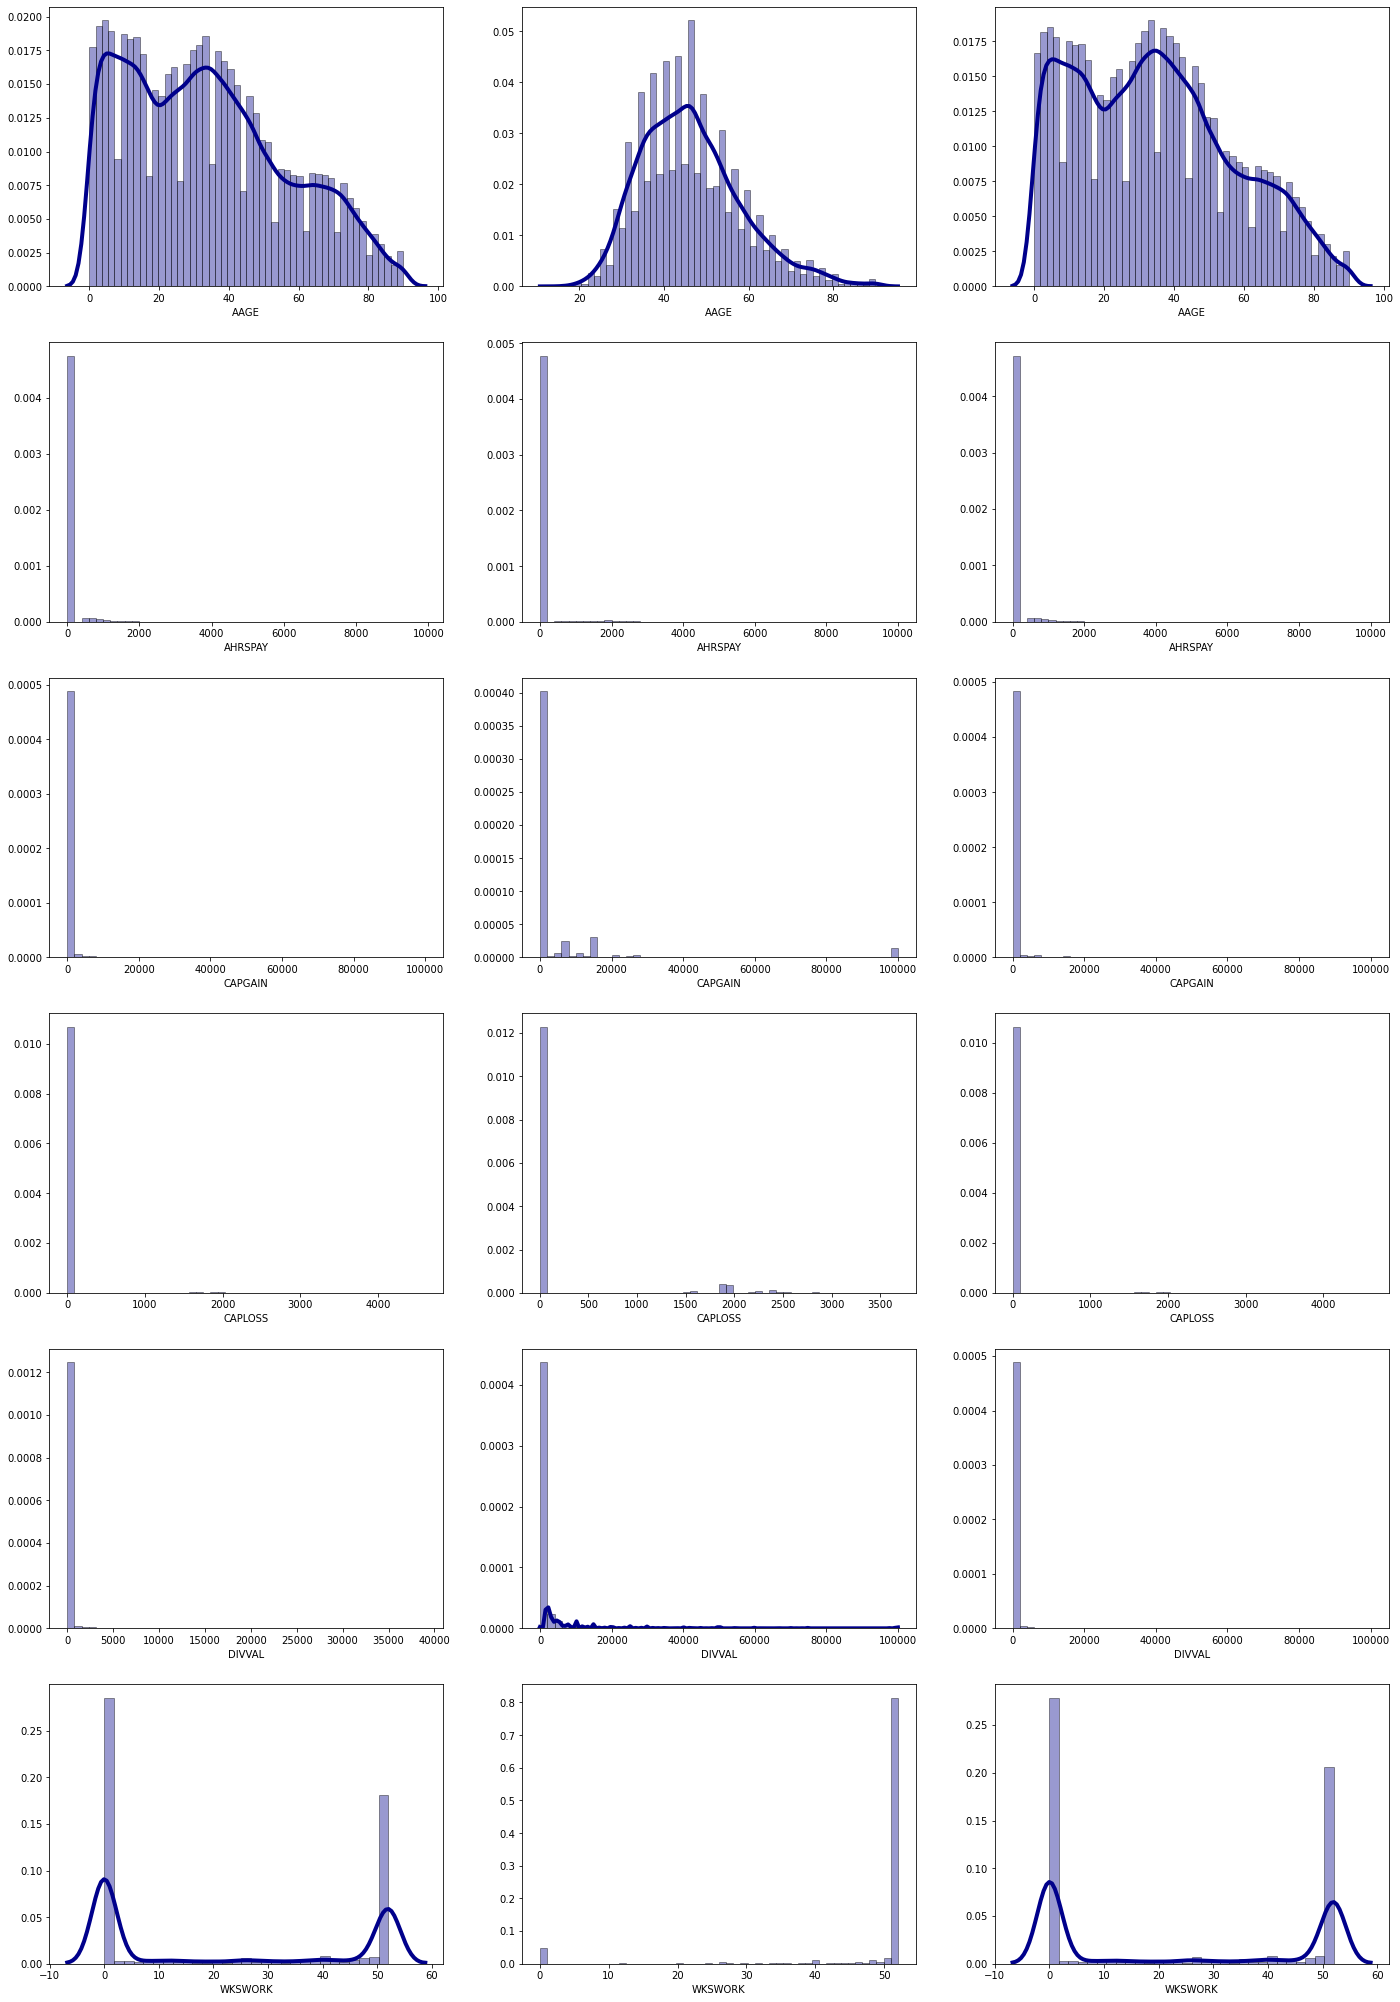

In [35]:
n = len(numeric_columns)
fig, axes = plt.subplots(n, 3, figsize=(24,n*6))


for r, col in enumerate(sorted(numeric_columns)):
    for c in range(3):
        if c == 0:
            sns.distplot(train[train["target"]==' - 50000.'][col], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                        ax=axes[r,c])

        elif c == 1:
           
            sns.distplot(train[train["target"]==' 50000+.'][col], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                        ax=axes[r,c])
        else:
           
            sns.distplot(train[col], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
                        ax=axes[r,c])

    

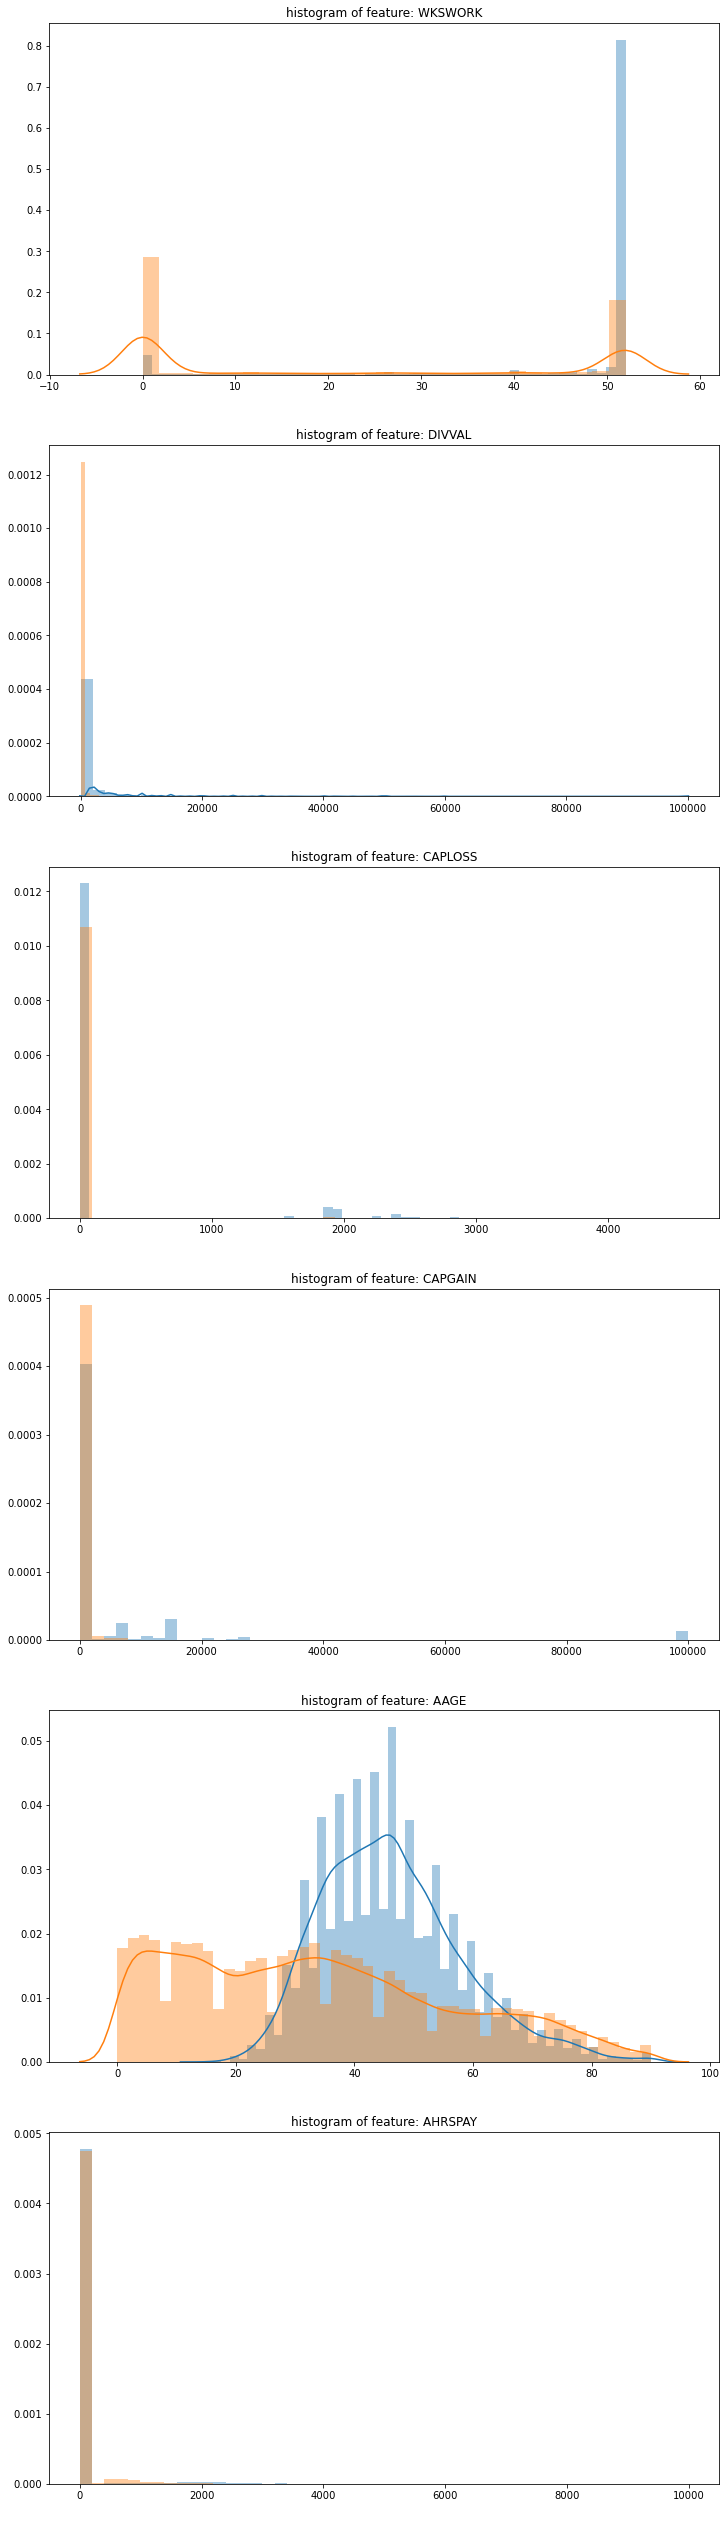

In [36]:
n = len(numeric_columns)
plt.figure(figsize=(12,36*n))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(numeric_columns):
    ax = plt.subplot(gs[i])
    sns.distplot(train[c][train["target"] == ' 50000+.'])
    sns.distplot(train[c][train["target"] == ' - 50000.'])
    ax.set_xlabel(" ")
    ax.set_title("histogram of feature: " + str(c))
plt.show()

12. Check the scatter-plots of AAGE featurs and the rest of numeric ones

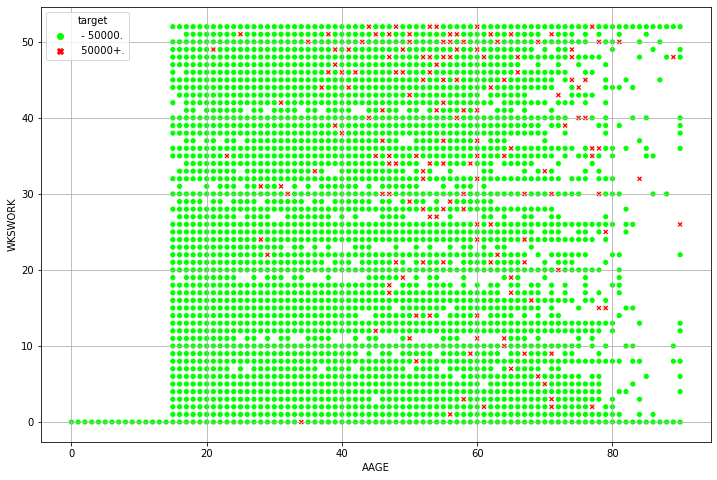

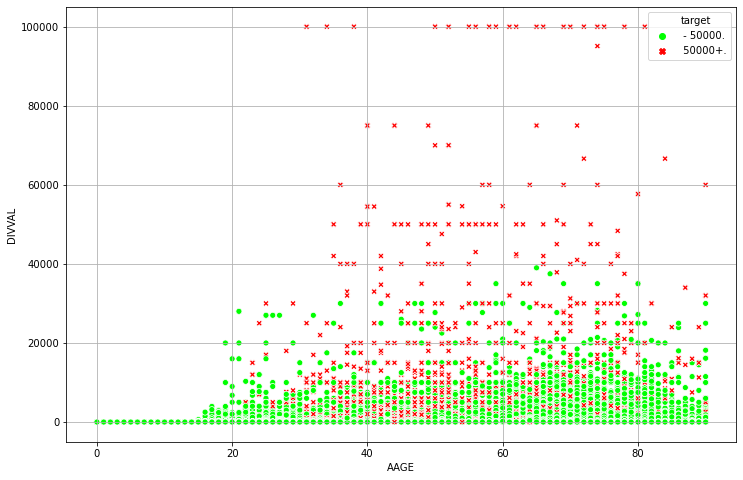

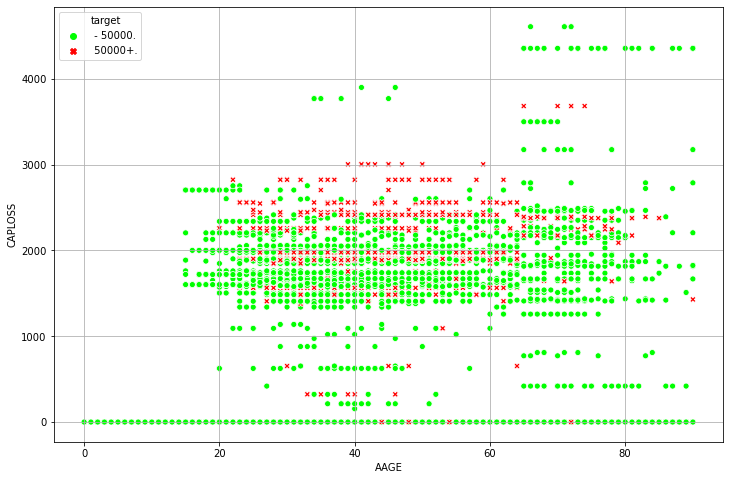

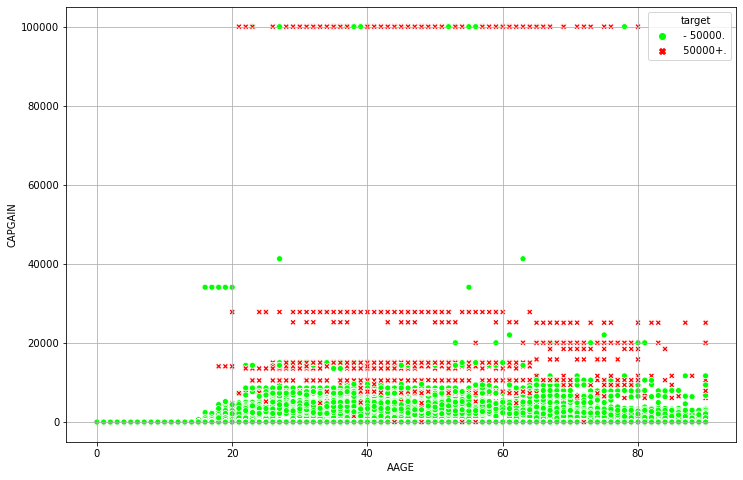

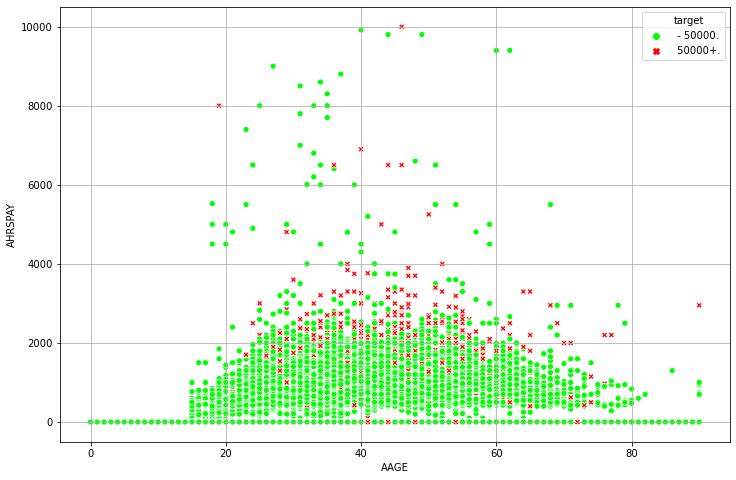

In [37]:
for col in numeric_columns_set -  {'AAGE'}:  
    plt.figure(figsize=(12,8))
    plt.grid()
    pal = [(0,1,0), (1,0,0)]
    sns.scatterplot(data=train, palette=pal, x = 'AAGE', y = col,hue='target',style='target')
    plt.show();

13. Check the scatter-plots of WKSWORK feature and the rest of numeric ones

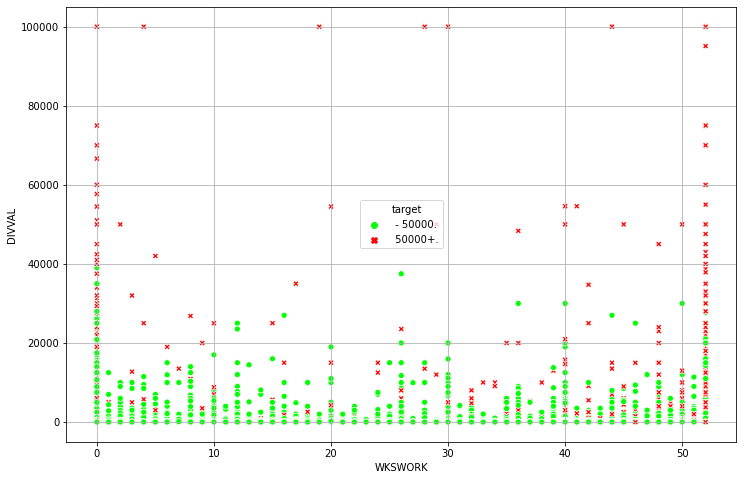

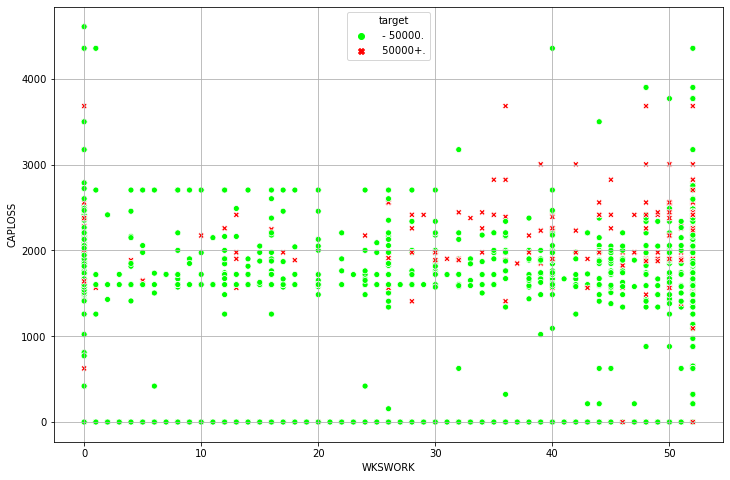

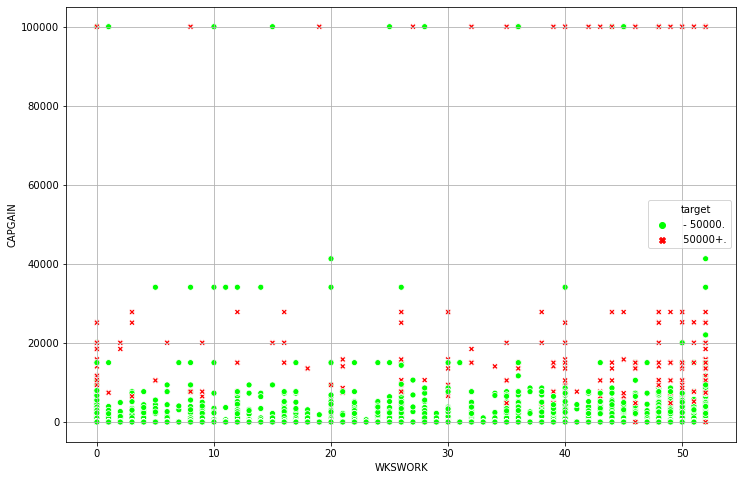

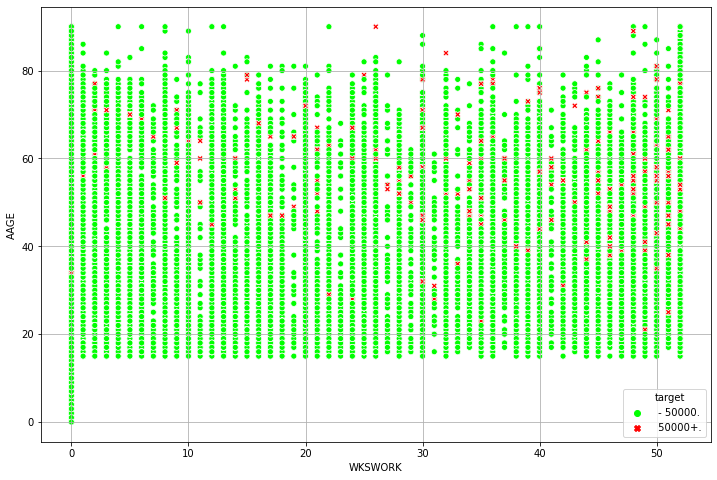

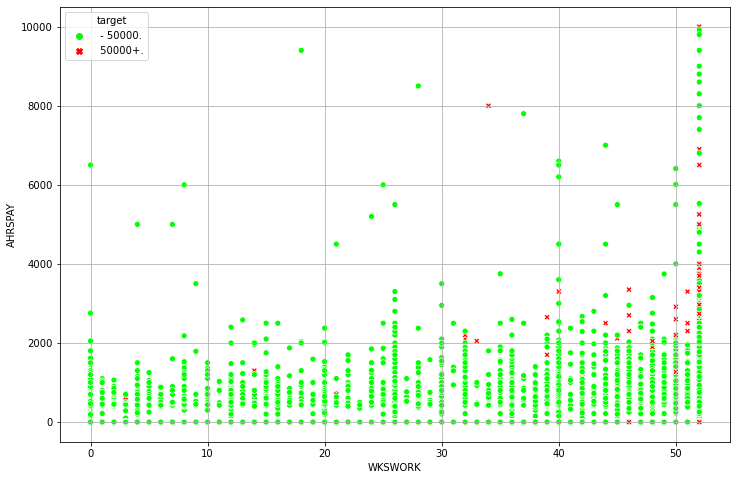

In [39]:
for col in numeric_columns_set - {"WKSWORK"}:  
    plt.figure(figsize=(12,8))
    plt.grid()
    pal = [(0,1,0), (1,0,0)]
    sns.scatterplot(data=train, palette=pal, x = "WKSWORK", y = col,hue='target',style='target')
    plt.show();

14. Build the histograms of counts of categories in every categorical feature

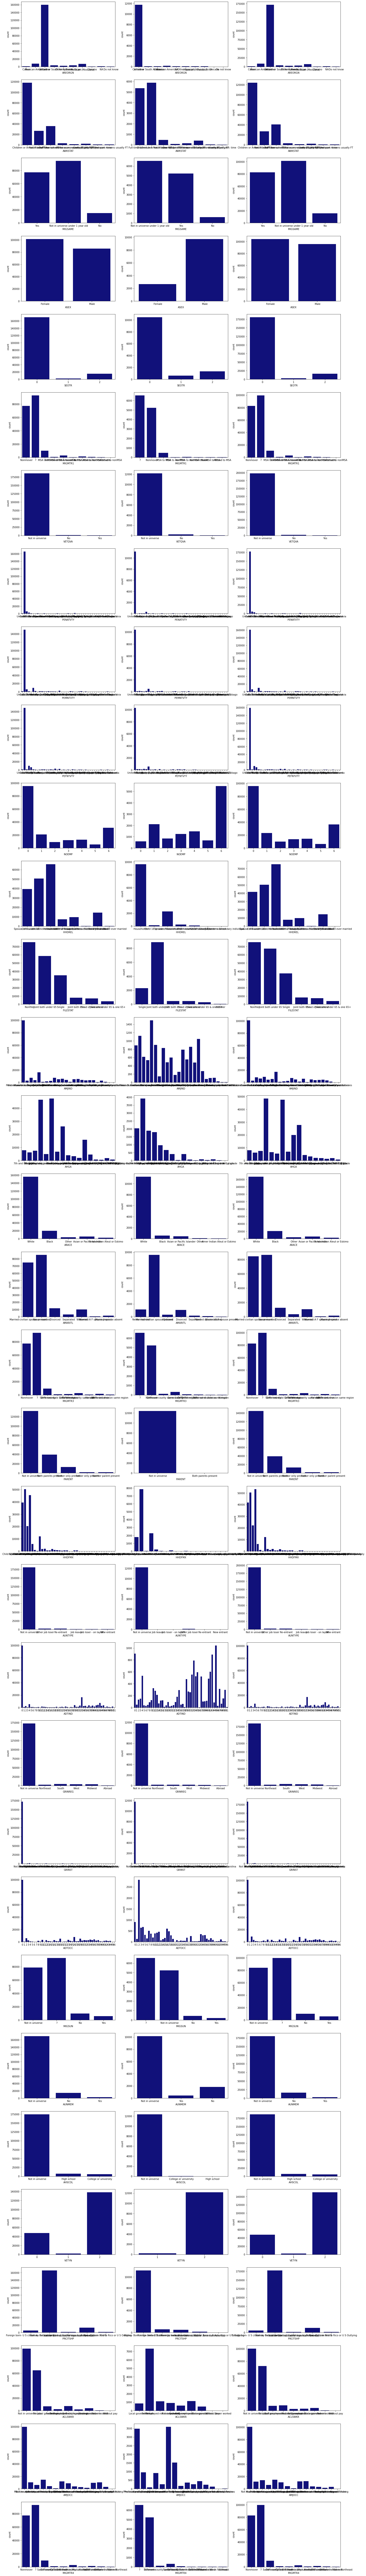

In [40]:
n = len(categorical_columns)
fig, axes = plt.subplots(n, 3, figsize=(24,n*6))


for r, col in enumerate(categorical_columns):
    for c in range(3):
        if c == 0:
            sns.countplot(train[train["target"]==' - 50000.'][col], 
             color = 'darkblue', 
                        ax=axes[r,c])

        elif c == 1:
            sns.countplot(train[train["target"]==' 50000+.'][col], 
             color = 'darkblue', 
                        ax=axes[r,c])
        else:
           
            sns.countplot(train[col], 
             color = 'darkblue', 
                        ax=axes[r,c])

15. Check the percentage for the target-feature

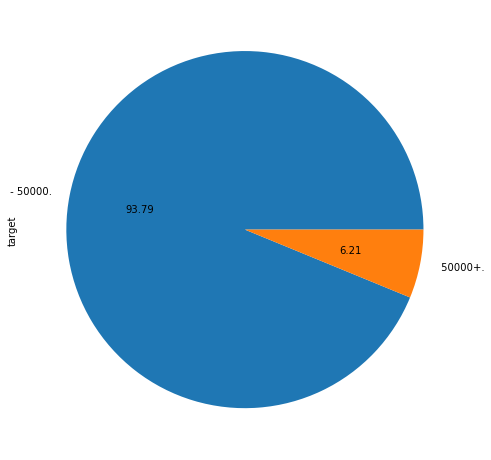

In [46]:
plt.figure(figsize = (8, 12))
train["target"].value_counts().plot.pie(autopct = "%.2f");

15. Split the train dataset into training and validation parts

In [47]:
X_data = train.drop("target", axis = 1)
y_data = np.where(train["target"] == ' - 50000.', 0, 1)

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42, stratify=y_data)

16. Check how many features with less then 10 unique values 

In [195]:
DF[(DF["Unique values number"] <= 10) & (DF["Feature"] != "target") & (DF["Feature"].isin(list(categorical_columns_set)))]

,Feature,Type,Description,Unique values number,PRC has ?,Not in universe,Min,Max,Mean,Median,Skew,Values
1,ACLSWKR,object,class of worker,9,0.000000,0.502423,165,100245,22169.222222,4227.0,1.749506,"[ Federal government, Local government, Neve..."
6,AHSCOL,object,enrolled in edu inst last wk,3,0.000000,0.936950,5688,186943,66507.666667,6892.0,1.731791,"[ College or university, High school, Not in..."
7,AMARITL,object,marital status,7,0.000000,0.000000,665,86485,28503.285714,10463.0,1.175820,"[ Divorced, Married-A F spouse present, Marr..."
10,ARACE,object,mace,5,0.000000,0.000000,2251,167365,39904.600000,5835.0,2.180685,"[ Amer Indian Aleut or Eskimo, Asian or Pacif..."
11,AREORGN,object,hispanic Origin,10,0.000000,0.000000,304,171907,19952.300000,2899.0,3.146879,"[ All other, Central or South American, Chic..."
12,ASEX,object,sex,2,0.000000,0.000000,95539,103984,99761.500000,99761.5,NaN,"[ Female, Male]"
13,AUNMEM,object,member of a labor union,3,0.000000,0.904452,3030,180459,66507.666667,16034.0,1.698423,"[ No, Not in universe, Yes]"
14,AUNTYPE,object,reason for unemployment,6,0.000000,0.969577,439,193453,33253.833333,1497.5,2.449067,"[ Job leaver, Job loser - on layoff, New ent..."
15,AWKSTAT,object,full or part time employment stat,8,0.000000,0.000000,525,123769,24940.375000,2816.5,2.221782,"[ Children or Armed Forces, Full-time schedul..."
19,FILESTAT,object,tax filer status,6,0.000000,0.000000,3867,75094,33253.833333,22876.5,0.508683,"[ Head of household, Joint both 65+, Joint b..."


17. Assign "AHSCOL", "AHGA" features for the ordinal encoding, and the features from the 16th point for the one-hot encoding

In [112]:
one_hot = DF[(DF["Unique values number"] <= 10) & (DF["Feature"] != "target") & (DF["Feature"].isin(list(categorical_columns_set)))]["Feature"].to_list()
categorical_columns_set = categorical_columns_set - set(one_hot) 

18. Assign the rest of categorical features for the catboost encoding

In [113]:
DF[(DF["Unique values number"] > 10) & (DF["Feature"] != "target") & (DF["Feature"].isin(list(categorical_columns_set)))]

,Feature,Type,Description,Unique values number,PRC has ?,Not in universe,Min,Max,Mean,Median,Skew,Values
2,ADTIND,int64,industry code,52,0.000000,0.000000,0,51,15.352320,0.0,0.516688,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,ADTOCC,int64,occupation code,47,0.000000,0.000000,0,46,11.306556,0.0,0.829238,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,AHGA,object,education,17,0.000000,0.000000,819,48407,11736.647059,6230.0,1.829594,"[ 10th grade, 11th grade, 12th grade no dipl..."
8,AMJIND,object,major industry code,24,0.000000,0.504624,36,100684,8313.458333,4086.5,4.643104,"[ Agriculture, Armed Forces, Business and re..."
9,AMJOCC,object,major occupation code,15,0.000000,0.504624,36,100684,13301.533333,6379.0,3.591896,"[ Adm support including clerical, Armed Force..."
21,GRINST,object,state of previous residence,51,0.003548,0.920946,31,183750,3912.215686,209.0,7.139934,"[ ?, Abroad, Alabama, Alaska, Arizona, Ar..."
22,HHDFMX,object,detailed household and family stat,38,0.000000,0.000000,1,53248,5250.605263,479.5,2.917698,"[ Child 18+ ever marr Not in a subfamily, Chi..."
31,PEFNTVTY,object,country of birth father,43,0.033645,0.000000,25,159163,4640.069767,392.0,6.503090,"[ ?, Cambodia, Canada, China, Columbia, C..."
32,PEMNTVTY,object,country of birth mother,43,0.030668,0.000000,32,160479,4640.069767,444.0,6.508730,"[ ?, Cambodia, Canada, China, Columbia, C..."
33,PENATVTY,object,country of birth self,43,0.017006,0.000000,23,176989,4640.069767,268.0,6.543925,"[ ?, Cambodia, Canada, China, Columbia, C..."


In [114]:
catboost = DF[(DF["Unique values number"] > 10) & (DF["Feature"] != "target") & (DF["Feature"].isin(list(categorical_columns_set)))]["Feature"].to_list()
categorical_columns_set = categorical_columns_set - set(catboost) 

In [115]:
categorical_columns_set

set()

19. Construct the column transformer

In [116]:
column_transformer = ColumnTransformer([
                      
                  ("One hot encoding"
                   , make_pipeline(QuestionMarkTransformer()
                                   , ce.one_hot.OneHotEncoder(use_cat_names = True)
                                  )
                   , one_hot)
    
                , ("Catboost encoding"
                   , make_pipeline(QuestionMarkTransformer()
                                   , ce.cat_boost.CatBoostEncoder(handle_missing = 'return_nan')
                                   , SimpleImputer(strategy='median'))
                   , catboost)
                , ("Numeric encoding", StandardScaler(), numeric_columns)
                                            ], remainder='passthrough'
)

20. Construct the default pipeline

In [117]:
pipe_select_model = Pipeline(
[
       ("Column transformer", column_transformer)
     , ("Model", LogisticRegression(class_weight='balanced', random_state=13))
    
], verbose=True
)

21. Find the best model using the Grid search

In [154]:
param_grid_select = {
    'Model': [ RandomForestClassifier(class_weight='balanced', n_jobs=-1, n_estimators=100, random_state=13)
             , LogisticRegression(class_weight='balanced', random_state=13)
             , GradientBoostingClassifier(random_state=13)
             , LGBMClassifier(class_weight='balanced', n_jobs=-1, n_estimators=100, random_state=13)
             , AdaBoostClassifier(n_estimators=100, random_state=13)
             , BalancedBaggingClassifier(n_estimators=100, n_jobs=-1, random_state=13)
             , ExtraTreesClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1, random_state=13)
             ]
      
}

grid_search_model_DF = print_grid_search_stat(pipe_select_model, param_grid_select, X_train, y_train, X_val, y_val, 3)
grid_search_model_DF

[Pipeline]  (step 1 of 2) Processing Column transformer, total=  10.1s
[Pipeline] ............. (step 2 of 2) Processing Model, total= 1.6min
Best params:
{'Model': GradientBoostingClassifier(random_state=13)}
Internal CV score: 0.543
best grid search: 0.564
Accuracy: 0.95705
F-score: 0.56431
Precision: 0.76132
Recall: 0.44830
Accuracy (balanced): 0.71950
MCC: 0.56447
ROC AUC: 0.71950


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,26.328388,2.739260,2.626440,0.249011,RandomForestClassifier(class_weight='balanced'...,{'Model': RandomForestClassifier(class_weight=...,0.450800,0.470297,0.453970,0.458356,0.008542,5
1,11.491684,1.198643,1.519867,0.357838,"LogisticRegression(class_weight='balanced', ra...",{'Model': LogisticRegression(class_weight='bal...,0.418381,0.409819,0.413360,0.413853,0.003513,7
2,68.136758,0.550426,1.420081,0.012746,GradientBoostingClassifier(random_state=13),{'Model': GradientBoostingClassifier(random_st...,0.530855,0.548283,0.550570,0.543236,0.008805,1
3,8.705550,0.107918,1.629270,0.010613,"LGBMClassifier(class_weight='balanced', random...",{'Model': LGBMClassifier(class_weight='balance...,0.474149,0.475238,0.467530,0.472306,0.003406,4
4,36.840863,0.052450,3.694953,0.625232,"AdaBoostClassifier(n_estimators=100, random_st...","{'Model': AdaBoostClassifier(n_estimators=100,...",0.515428,0.538156,0.536145,0.529909,0.010273,2
5,74.803333,3.175709,7.039910,0.179346,"BalancedBaggingClassifier(n_estimators=100, n_...",{'Model': BalancedBaggingClassifier(n_estimato...,0.482126,0.477545,0.472030,0.477234,0.004128,3
6,28.769764,6.685436,3.248225,0.843412,"ExtraTreesClassifier(class_weight='balanced', ...",{'Model': ExtraTreesClassifier(class_weight='b...,0.435317,0.451320,0.443139,0.443259,0.006534,6


22. Try to find anomalies in the data assuming that 1% is inappropriate part by default. Compare eliminated data with 

In [121]:
pipe_anomaly = Pipeline(
    [   
        ("Column transformer", column_transformer)
      , ('Model', AnomalyDetectionChainEstimator(
         
          anomaly_model = IsolationForest(n_estimators=500, max_samples='auto', \
                     contamination=0.01, bootstrap=False, n_jobs=-1, random_state=13)
        , estimator = GradientBoostingClassifier(random_state=13)
      )  
        )

    ], verbose = True
)

param_grid_anomaly = {
    'Model': [ 
               GradientBoostingClassifier(random_state=13)
             , AnomalyDetectionChainEstimator(anomaly_model = IsolationForest(n_estimators=500, max_samples='auto', \
                     contamination=0.01, bootstrap=False, n_jobs=-1, random_state=13)
             , estimator = GradientBoostingClassifier(random_state=13)
                                              ) 
             ]
}

print_grid_search_stat(pipe_anomaly, param_grid_anomaly, X_train, y_train, X_val, y_val, 2)

[Pipeline]  (step 1 of 2) Processing Column transformer, total=   8.5s
[Pipeline] ............. (step 2 of 2) Processing Model, total= 1.5min
Best params:
{'Model': GradientBoostingClassifier(random_state=13)}
Internal CV score: 0.541
best grid search: 0.564
Accuracy: 0.95705
F-score: 0.56431
Precision: 0.76132
Recall: 0.44830
Accuracy (balanced): 0.71950
MCC: 0.56447
ROC AUC: 0.71950


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,47.861915,0.101946,2.193006,0.004506,GradientBoostingClassifier(random_state=13),{'Model': GradientBoostingClassifier(random_st...,0.531659,0.550487,0.541073,0.009414,1
1,165.080671,4.390567,2.057140,0.001324,AnomalyDetectionChainEstimator(anomaly_model=I...,{'Model': AnomalyDetectionChainEstimator(anoma...,0.528539,0.551472,0.540005,0.011467,2


23. Try to find the contamination value which is get the better result comparing to the model without elimination

In [122]:
param_grid_contamination = {
    'Model__anomaly_model__contamination': [0.001, 0.005, 0.015]
}

grid_search_contam_DF = print_grid_search_stat(pipe_anomaly, param_grid_contamination, X_train, y_train, X_val, y_val, 2)
grid_search_contam_DF

[Pipeline]  (step 1 of 2) Processing Column transformer, total=   8.5s
[Pipeline] ............. (step 2 of 2) Processing Model, total= 5.2min
Best params:
{'Model__anomaly_model__contamination': 0.001}
Internal CV score: 0.543
best grid search: 0.566
Accuracy: 0.95712
F-score: 0.56563
Precision: 0.76145
Recall: 0.44992
Accuracy (balanced): 0.72030
MCC: 0.56558
ROC AUC: 0.72030


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__anomaly_model__contamination,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,172.849973,4.449664,2.701983,0.608614,0.001,{'Model__anomaly_model__contamination': 0.001},0.533520,0.552167,0.542844,0.009324,1
1,165.994636,6.431478,2.684627,0.598350,0.005,{'Model__anomaly_model__contamination': 0.005},0.531820,0.549873,0.540847,0.009027,3
2,162.354682,0.332945,2.053568,0.026565,0.015,{'Model__anomaly_model__contamination': 0.015},0.528084,0.554592,0.541338,0.013254,2


24. Transform the data and delete 0.1% of it as an anomaly

In [125]:
X_train_tr = column_transformer.fit_transform(X_train, y_train)
X_val_tr = column_transformer.transform(X_val)
X_train_an, y_train_an = AnomalyDetectionChainEstimator(anomaly_model = IsolationForest(n_estimators=500, max_samples='auto', \
                     contamination=0.001, bootstrap=False, n_jobs=-1, random_state=13)).transform(X_train_tr, y_train)

25. Add to the data clusters and compare the result with the default model

In [126]:
pipe_cluster_model = Pipeline(
[
       ("Model", GradientBoostingClassifier(random_state=13))
    
], verbose=True
)

param_grid_cluster = {
    'Model': [ 
               GradientBoostingClassifier(random_state=13)
             , ClusterChainEstimator(cluster_model = GaussianMixture(n_components=4, verbose = 1, random_state=13)
                                           , estimator = GradientBoostingClassifier(random_state=13)
                                    )
             ]
}

print_grid_search_stat(pipe_cluster_model, param_grid_cluster, X_train_an, y_train_an, X_val_tr, y_val, 2)

Initialization 0
  Iteration 10
Initialization converged: True
[Pipeline] ............. (step 1 of 1) Processing Model, total= 7.6min
Best params:
{'Model': ClusterChainEstimator(cluster_model=GaussianMixture(n_components=4,
                                                    random_state=13,
                                                    verbose=1),
                      estimator=GradientBoostingClassifier(random_state=13))}
Internal CV score: 0.526
best grid search: 0.568
Accuracy: 0.95727
F-score: 0.56759
Precision: 0.76278
Recall: 0.45194
Accuracy (balanced): 0.72132
MCC: 0.56746
ROC AUC: 0.72132


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,62.920758,0.883903,0.240492,0.007586,GradientBoostingClassifier(random_state=13),{'Model': GradientBoostingClassifier(random_st...,0.520274,0.531235,0.525754,0.005481,2
1,81.875497,1.800184,1.864722,0.728909,ClusterChainEstimator(cluster_model=GaussianMi...,{'Model': ClusterChainEstimator(cluster_model=...,0.520472,0.531334,0.525903,0.005431,1


25. Try to find the best number of clusters

In [127]:
pipe_cluster = Pipeline(
[
       ("Model", ClusterChainEstimator(cluster_model = GaussianMixture(n_components=4, verbose = 1, random_state=13)
                                           , estimator = GradientBoostingClassifier(random_state=13)
                                    )
       )
    
], verbose=True
)

param_grid_clusters = {
    'Model__cluster_model__n_components': np.arange(3, 10, 1)
}

grid_search_DF = print_grid_search_stat(pipe_cluster, param_grid_clusters, X_train_an, y_train_an, X_val_tr, y_val, 2)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
[Pipeline] ............. (step 1 of 1) Processing Model, total=34.8min
Best params:
{'Model__cluster_model__n_components': 8}
Internal CV score: 0.529
best grid search: 0.569
Accuracy: 0.95727
F-score: 0.56934
Precision: 0.75995
Recall: 0.45517
Accuracy (balanced): 0.72283
MCC: 0.56836
ROC AUC: 0.72283


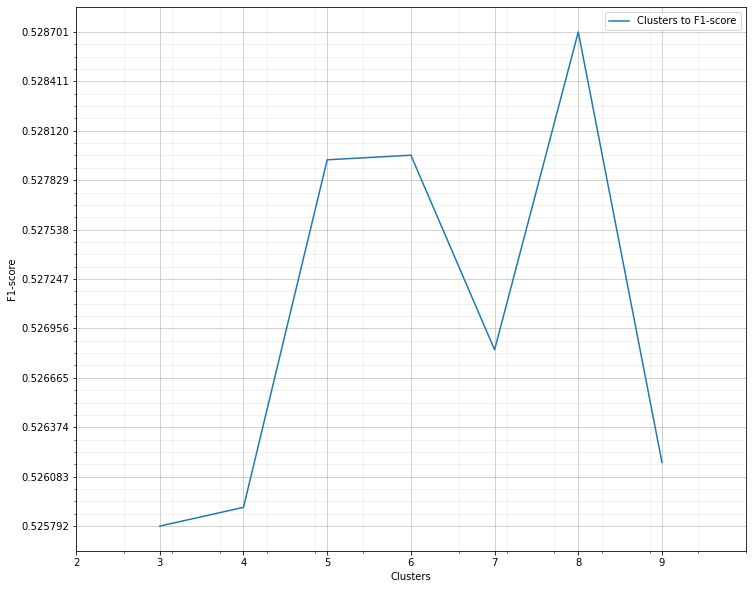

In [128]:
y = grid_search_DF["mean_test_score"]

print_grid_search_graph(grid_search = grid_search_DF
                            , param = "param_Model__cluster_model__n_components"
                            , plot_label = "Clusters to F1-score"
                            , xlabel = "Clusters"
                            , ylabel = "F1-score"
                            , xticks = np.arange(2, 10, 1)
                            , xticks_minor = np.linspace(2, 10, 15)
                            , yticks = np.linspace(min(y), max(y), 11)
                            , yticks_minor = np.linspace(min(y), max(y), 41)
                       )

26. Add to all data (train, val and test) the cluster feature

In [129]:
X_test = test.drop("target", axis = 1)
y_test = np.where(test["target"] == ' - 50000.', 0, 1)

gauss = GaussianMixture(n_components=8, verbose = 1, random_state=13)

train_cl = gauss.fit_predict(X_train_an)


Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


In [130]:
N, M = X_train_an.shape
X_train_cl = np.zeros((N, M + 1))
X_train_cl[:, :-1] = X_train_an
X_train_cl[:, -1] = train_cl

In [131]:
val_cl = gauss.predict(X_val_tr)

N, M = X_val_tr.shape
X_val_cl = np.zeros((N, M + 1))
X_val_cl[:, :-1] = X_val_tr
X_val_cl[:, -1] = val_cl

In [132]:
X_test_tr = column_transformer.transform(X_test)

test_cl = gauss.predict(X_test_tr)

N, M = X_test_tr.shape
X_test_cl = np.zeros((N, M + 1))
X_test_cl[:, :-1] = X_test_tr
X_test_cl[:, -1] = test_cl

27. Implement PCA

[Pipeline] ............... (step 1 of 2) Processing PCA, total=  10.2s
[Pipeline] ............. (step 2 of 2) Processing Model, total= 4.5min
Best params:
{'PCA__n_components': 0.999}
Internal CV score: 0.475
best grid search: 0.492
Accuracy: 0.95289
F-score: 0.49162
Precision: 0.74386
Recall: 0.36712
Accuracy (balanced): 0.67938
MCC: 0.50233
ROC AUC: 0.67938


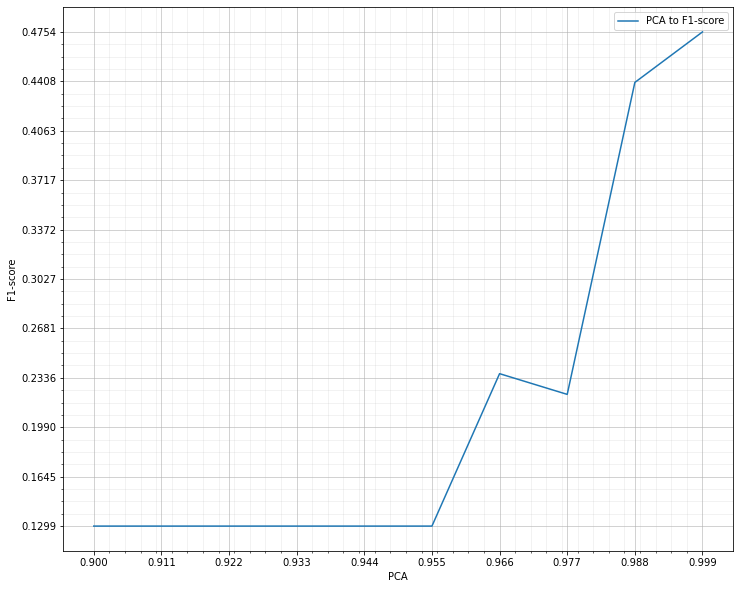

In [134]:
pipe_PCA = Pipeline(
[
     ("PCA", PCA(n_components=0.99, svd_solver = 'full'))
   , ("Model", GradientBoostingClassifier(random_state=13))
       
    
], verbose=True
)

param_grid_PCA = {
    'PCA__n_components': np.linspace(0.9, 0.999, 10)
}

grid_search_PCA_DF = print_grid_search_stat(pipe_PCA, param_grid_PCA, X_train_cl, y_train_an, X_val_cl, y_val, 2)

y = grid_search_PCA_DF["mean_test_score"]

print_grid_search_graph(grid_search = grid_search_PCA_DF
                            , param = "param_PCA__n_components"
                            , plot_label = "PCA to F1-score"
                            , xlabel = "PCA"
                            , ylabel = "F1-score"
                            , xticks = np.linspace(0.9, 0.999, 10)
                            , xticks_minor = np.linspace(0.9, 0.999, 40)
                            , yticks = np.linspace(min(y), max(y), 11)
                            , yticks_minor = np.linspace(min(y), max(y), 41)
                       )

28. Implement Kbest with the estimator f_classif (ANOVA)

[Pipeline] ............. (step 1 of 2) Processing KBest, total=   0.5s
[Pipeline] ............. (step 2 of 2) Processing Model, total= 1.3min
Best params:
{'KBest__k': 110}
Internal CV score: 0.538
best grid search: 0.568
Accuracy: 0.95717
F-score: 0.56789
Precision: 0.75930
Recall: 0.45355
Accuracy (balanced): 0.72202
MCC: 0.56703
ROC AUC: 0.72202


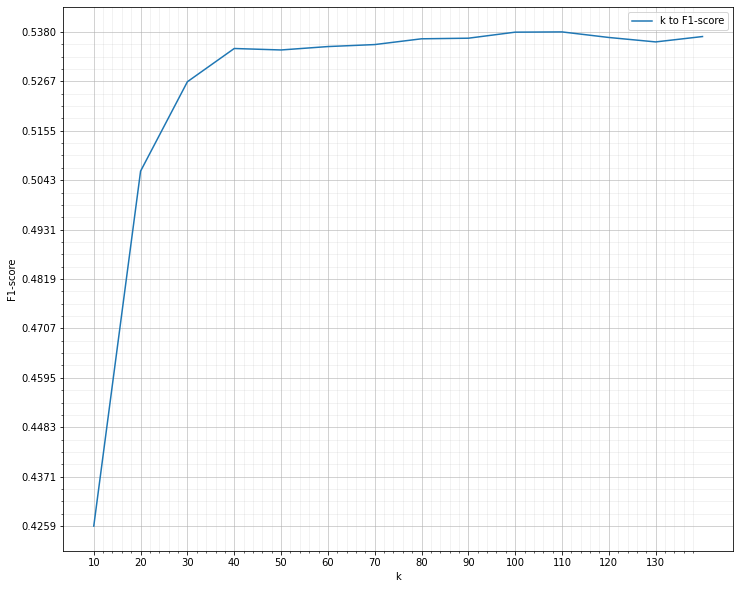

In [135]:
pipe_KBest= Pipeline(
[
     ("KBest", SelectKBest())
   , ("Model", GradientBoostingClassifier(random_state=13))
       
    
], verbose=True
)

param_grid_KBest = {
    'KBest__k': np.arange(10, 141, 10)
}

grid_search_KBest_DF = print_grid_search_stat(pipe_KBest, param_grid_KBest, X_train_cl, y_train_an, X_val_cl, y_val, 2)

y = grid_search_KBest_DF["mean_test_score"]

print_grid_search_graph(grid_search = grid_search_KBest_DF
                            , param = "param_KBest__k"
                            , plot_label = "k to F1-score"
                            , xlabel = "k"
                            , ylabel = "F1-score"
                            , xticks = np.arange(10, 139, 10)
                            , xticks_minor = np.arange(10, 139, 2)
                            , yticks = np.linspace(min(y), max(y), 11)
                            , yticks_minor = np.linspace(min(y), max(y), 41)
                       )

29. Implement Kbest with the SelectFromModel with an estimator AdaBoostClassifier and threshold in the range of 0.005 to 0.03

[Pipeline] ... (step 1 of 2) Processing SelectFromModel, total= 1.0min
[Pipeline] ............. (step 2 of 2) Processing Model, total=  54.8s
Best params:
{'SelectFromModel__threshold': 0.0005}
Internal CV score: 0.536
best grid search: 0.565
Accuracy: 0.95702
F-score: 0.56505
Precision: 0.75937
Recall: 0.44992
Accuracy (balanced): 0.72024
MCC: 0.56470
ROC AUC: 0.72024


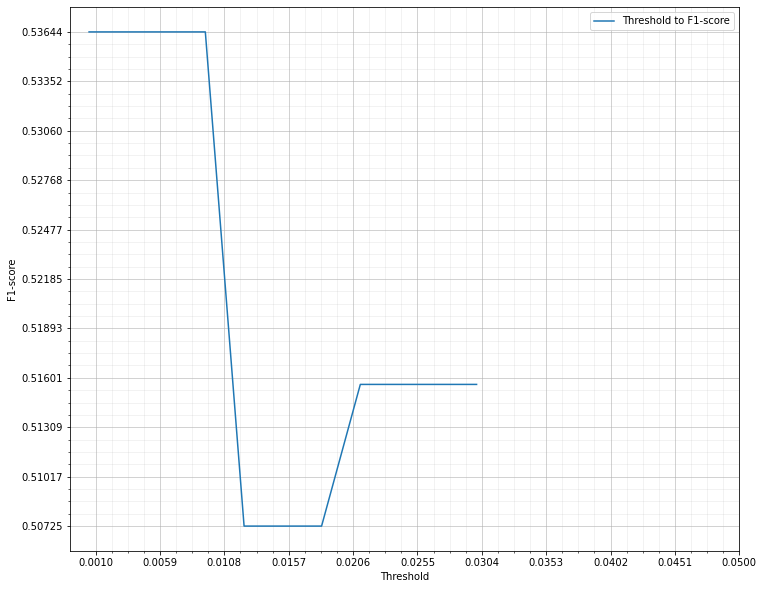

In [136]:
pipe_SfM = Pipeline(
[
     ("SelectFromModel", SelectFromModel(estimator=AdaBoostClassifier(n_estimators=100, random_state=13), threshold=0.001))
   , ("Model", GradientBoostingClassifier(random_state=13))
       
    
], verbose=True
)

param_grid_SfM = {
    'SelectFromModel__threshold': np.linspace(0.0005, 0.03, 11)
}

grid_search_SfM_DF = print_grid_search_stat(pipe_SfM, param_grid_SfM, X_train_cl, y_train_an, X_val_cl, y_val, 2)

y = grid_search_SfM_DF["mean_test_score"]

print_grid_search_graph(grid_search = grid_search_SfM_DF
                            , param = "param_SelectFromModel__threshold"
                            , plot_label = "Threshold to F1-score"
                            , xlabel = "Threshold"
                            , ylabel = "F1-score"
                            , xticks =  np.linspace(0.001, 0.05, 11)
                            , xticks_minor =  np.linspace(0.001, 0.05, 41)
                            , yticks = np.linspace(min(y), max(y), 11)
                            , yticks_minor = np.linspace(min(y), max(y), 41)
                       )

30. Implement the sampling stratagies

In [145]:
pipe_sampling = Pipeline(
    [   
        ("Oversampling", RandomOverSampler(sampling_strategy=0.3))
      , ("Undersampling", RandomUnderSampler(sampling_strategy=0.7))
      , ("Model", GradientBoostingClassifier(random_state=13))

    ], verbose = True
)

param_grid_sampling = {
      'Undersampling__sampling_strategy': np.linspace(0.1, 0.5, 5)
    , 'Oversampling__sampling_strategy': np.linspace(0.3, 0.9, 7)
}

grid_search_sampling_DF = print_grid_search_stat(pipe_sampling, param_grid_sampling, X_train_cl, y_train_an, X_val_cl, y_val, 2)

grid_search_sampling_DF


[Pipeline] ...... (step 1 of 3) Processing Oversampling, total=   0.2s
[Pipeline] ..... (step 2 of 3) Processing Undersampling, total=   0.2s
[Pipeline] ............. (step 3 of 3) Processing Model, total= 2.8min
Best params:
{'Oversampling__sampling_strategy': 0.3, 'Undersampling__sampling_strategy': 0.30000000000000004}
Internal CV score: 0.571
best grid search: 0.578
Accuracy: 0.93422
F-score: 0.57791
Precision: 0.48010
Recall: 0.72577
Accuracy (balanced): 0.83689
MCC: 0.55752
ROC AUC: 0.83689


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Oversampling__sampling_strategy,param_Undersampling__sampling_strategy,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.358097,0.002610,0.000000,0.000000,0.3,0.1,"{'Oversampling__sampling_strategy': 0.3, 'Unde...",NaN,NaN,NaN,NaN,12
1,0.187729,0.003212,0.000000,0.000000,0.3,0.2,"{'Oversampling__sampling_strategy': 0.3, 'Unde...",NaN,NaN,NaN,NaN,33
2,88.754559,0.471161,0.304069,0.009388,0.3,0.3,"{'Oversampling__sampling_strategy': 0.3, 'Unde...",0.569754,0.571383,0.570569,0.000814,1
3,65.204723,0.217403,0.296741,0.007492,0.3,0.4,"{'Oversampling__sampling_strategy': 0.3, 'Unde...",0.518528,0.540224,0.529376,0.010848,3
4,54.212958,0.032714,0.328803,0.020618,0.3,0.5,"{'Oversampling__sampling_strategy': 0.3, 'Unde...",0.516756,0.522601,0.519679,0.002922,5
5,0.187810,0.001511,0.000000,0.000000,0.4,0.1,"{'Oversampling__sampling_strategy': 0.4, 'Unde...",NaN,NaN,NaN,NaN,32
6,0.188663,0.001766,0.000000,0.000000,0.4,0.2,"{'Oversampling__sampling_strategy': 0.4, 'Unde...",NaN,NaN,NaN,NaN,31
7,0.184081,0.002258,0.000000,0.000000,0.4,0.3,"{'Oversampling__sampling_strategy': 0.4, 'Unde...",NaN,NaN,NaN,NaN,30
8,87.066394,0.261770,0.271693,0.004125,0.4,0.4,"{'Oversampling__sampling_strategy': 0.4, 'Unde...",0.541617,0.547155,0.544386,0.002769,2
9,71.080649,0.485397,0.295161,0.012041,0.4,0.5,"{'Oversampling__sampling_strategy': 0.4, 'Unde...",0.517059,0.525344,0.521201,0.004143,4


31. Try to find best hyperparameters for the model

In [167]:
pipe = Pipeline(
    [   
        ("Oversampling", RandomOverSampler(sampling_strategy=0.3))
      , ("Undersampling", RandomUnderSampler(sampling_strategy=0.3))
      , ("Model", GradientBoostingClassifier(random_state=13))

    ], verbose = True
)

param_grid = {
    "Model__learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "Model__max_depth":[3, 5, 8],
    #"Model__criterion": ["friedman_mse",  "mae"],
    "Model__n_estimators":[10, 50, 100]
    }

grid_search = GridSearchCV(estimator = pipe
                           , param_grid = param_grid
                           , cv=2
                           , scoring = 'f1'
                           , n_jobs = -1
                           )
grid_search.fit(X_train_cl, y_train_an)

print("Best params:")
print(grid_search.best_params_)
print(f"Internal CV score: {grid_search.best_score_:.3f}")
print(
    (
        "best grid search: %.3f"
        % grid_search.score(X_val_cl, y_val)
    )
)


[Pipeline] ...... (step 1 of 3) Processing Oversampling, total=   0.2s
[Pipeline] ..... (step 2 of 3) Processing Undersampling, total=   0.2s
[Pipeline] ............. (step 3 of 3) Processing Model, total= 6.7min
Best params:
{'Model__learning_rate': 0.05, 'Model__max_depth': 8, 'Model__n_estimators': 100}
Internal CV score: 0.580
best grid search: 0.592


In [168]:
y_pred = grid_search.predict(X_val_cl)

print_metrics(y_val, y_pred)
print("\n", classification_report(y_val, y_pred))

Accuracy: 0.93803
F-score: 0.59198
Precision: 0.50042
Recall: 0.72456
Accuracy (balanced): 0.83835
MCC: 0.57090
ROC AUC: 0.83835

               precision    recall  f1-score   support

           0       0.98      0.95      0.97     37429
           1       0.50      0.72      0.59      2476

    accuracy                           0.94     39905
   macro avg       0.74      0.84      0.78     39905
weighted avg       0.95      0.94      0.94     39905



In [171]:
y_pred = grid_search.predict(X_test_cl)

print_metrics(y_test, y_pred)
print("\n", classification_report(y_test, y_pred))

Accuracy: 0.93932
F-score: 0.59865
Precision: 0.50742
Recall: 0.72987
Accuracy (balanced): 0.84152
MCC: 0.57795
ROC AUC: 0.84152

               precision    recall  f1-score   support

           0       0.98      0.95      0.97     93576
           1       0.51      0.73      0.60      6186

    accuracy                           0.94     99762
   macro avg       0.74      0.84      0.78     99762
weighted avg       0.95      0.94      0.94     99762



In [175]:
weights = np.array([1 if i == 0 else 3 for i in y_train_an])

model = GradientBoostingClassifier(random_state=13
                                   , learning_rate = 0.05
                                   , max_depth = 8
                                   , n_estimators = 100)

model.fit(X_train_cl, y_train_an, weights)

y_pred = model.predict(X_val_cl)

print_metrics(y_val, y_pred)
print("\n", classification_report(y_val, y_pred))

Accuracy: 0.94920
F-score: 0.61920
Precision: 0.57885
Recall: 0.66559
Accuracy (balanced): 0.81678
MCC: 0.59379
ROC AUC: 0.81678

               precision    recall  f1-score   support

           0       0.98      0.97      0.97     37429
           1       0.58      0.67      0.62      2476

    accuracy                           0.95     39905
   macro avg       0.78      0.82      0.80     39905
weighted avg       0.95      0.95      0.95     39905



In [176]:
y_pred = model.predict(X_test_cl)

print_metrics(y_test, y_pred)
print("\n", classification_report(y_test, y_pred))

Accuracy: 0.94953
F-score: 0.61980
Precision: 0.58155
Recall: 0.66343
Accuracy (balanced): 0.81594
MCC: 0.59437
ROC AUC: 0.81594

               precision    recall  f1-score   support

           0       0.98      0.97      0.97     93576
           1       0.58      0.66      0.62      6186

    accuracy                           0.95     99762
   macro avg       0.78      0.82      0.80     99762
weighted avg       0.95      0.95      0.95     99762

